# **Metodología crisp-dm para predecir las atenciones médicas en el hospital de apoyo maría auxiliadora**

# **Comprensión del negocio**

## 1.1 Objetivos del negocio

El objetivo principal del proyecto es optimizar la gestión hospitalaria mediante un modelo predictivo que anticipe la asistencia o inasistencia de los pacientes a sus consultas médicas. Esto permitirá mejorar la asignación de recursos (médicos, personal y equipamiento), reducir la congestión en las instalaciones y aumentar la calidad de la atención. Además, se busca disminuir las inasistencias, optimizando el uso del tiempo y reduciendo la saturación de los servicios de salud.

---

## 1.2 Evaluación de la situación

El Hospital María Auxiliadora dispone de registros históricos de pacientes, diagnósticos y citas médicas. No obstante, existen desafíos en la calidad y preparación de los datos para análisis predictivo. Aunque se cuenta con sistemas de gestión, no se utiliza un enfoque predictivo para anticipar inasistencias. Por ello, se requiere aplicar técnicas de minería de datos para descubrir patrones de comportamiento y mejorar la planificación de recursos médicos.

---

## 1.3 Objetivos de la minería de datos

El objetivo específico es construir un modelo de clasificación que prediga la probabilidad de que un paciente asista o no a su cita médica. Esto permitirá identificar patrones asociados a inasistencias y factores de riesgo, facilitando una programación más eficiente, disminuyendo las pérdidas por ausencias y mejorando la atención médica y uso de los servicios.

# **Conociendo nuestros datos**

In [ ]:
# Librerías base
import pandas as pd
import numpy as np
import warnings

# Visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocesamiento y escalado
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Codificación
import category_encoders as ce

# Desbalanceo
from imblearn.combine import SMOTETomek

# Opcional
warnings.filterwarnings("ignore")


## 1) Recolección de los datos iniciales

El dataset utilizado en este proyecto fue obtenido de la plataforma de datos abiertos del gobierno del Perú. Contiene registros de citas médicas del Hospital de Apoyo María Auxiliadora durante el año 2023. Los datos fueron recopilados por el área de informática del hospital y están disponibles públicamente, lo que garantiza transparencia y legalidad en su uso. Este conjunto de datos incluye información relevante tanto del paciente como del servicio médico brindado, permitiendo un análisis predictivo confiable y enfocado en la asistencia a las citas médicas.

---



## 2) Descripción de los datos

El conjunto de datos contiene variables clave relacionadas con la atención médica, incluyendo características del paciente, detalles de la cita y ubicación del hospital. La variable objetivo del análisis es `ATENDIDO`, que indica si el paciente asistió (`VINO`) o no (`NO VINO`) a su cita.

A continuación, se resumen algunas variables principales:

| Variable            | Descripción                                             | Tipo de dato     |
|---------------------|---------------------------------------------------------|------------------|
| FECHA_CORTE         | Fecha del corte del dataset                             | Numérico         |
| ID                  | Identificador único del paciente (anonimizado)          | Alfanumérico     |
| DIA_CITA            | Fecha programada de la cita médica                      | Numérico         |
| ESPECIALIDAD        | Consultorio o especialidad de atención                  | Texto            |
| SEXO                | Sexo del paciente                                       | Texto            |
| EDAD                | Edad del paciente                                       | Numérico         |
| SEGURO              | Indica si el paciente cuenta con seguro de salud        | Texto            |
| PRESENCIAL_REMOTO   | Tipo de atención (presencial o remota)                  | Texto            |
| ATENDIDO            | Asistencia del paciente a su cita médica                | Texto            |
| MONTO               | Pago realizado por la cita médica (en soles)            | Numérico         |
| DEPARTAMENTO        | Departamento del hospital                               | Texto            |
| UBIGEO              | Código geográfico de ubicación                          | Alfanumérico     |

Estas variables permiten construir un modelo predictivo robusto para anticipar la asistencia médica de los pacientes.

In [ ]:
# Leer datos
data = pd.read_csv("DATOS HOSPITAL MARIA AUXILIADORA.csv",sep=";")
data.tail()

,FECHA_CORTE,ID,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,SEXO,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO
450624,20240430,150,20231201,20231230,PSICOLOGIA,FEMENINO,64.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450625,20240430,950469,20231205,20231230,PSICOLOGIA,FEMENINO,14.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450626,20240430,1373246,20231205,20231230,PSICOLOGIA,FEMENINO,8.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450627,20240430,2118536,20231205,20231230,PSICOLOGIA,MASCULINO,6.0,SI,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133
450628,20240430,2346541,20231207,20231230,PSICOLOGIA,MASCULINO,11.0,NO,PRESENCIAL,NO,30,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133


## 3) Verificación de la calidad de los datos

### Informacion de las variables

In [ ]:
# Informacion de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450629 entries, 0 to 450628
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   FECHA_CORTE        450629 non-null  int64  
 1   ID                 450629 non-null  int64  
 2   DIA_SOLICITACITA   450629 non-null  int64  
 3   DIA_CITA           450629 non-null  int64  
 4   ESPECIALIDAD       450629 non-null  object 
 5   SEXO               450629 non-null  object 
 6   EDAD               450628 non-null  float64
 7   SEGURO             450626 non-null  object 
 8   PRESENCIAL_REMOTO  450629 non-null  object 
 9   ATENDIDO           450629 non-null  object 
 10  MONTO              450629 non-null  int64  
 11  DEPARTAMENTO       450629 non-null  object 
 12  PROVINCIA          450629 non-null  object 
 13  DISTRITO           450629 non-null  object 
 14  UBIGEO             450629 non-null  int64  
dtypes: float64(1), int64(6), object(8)
memory usage: 51

In [ ]:
print(data["SEXO"].unique())
print(data["SEGURO"].unique())
print(data["PRESENCIAL_REMOTO"].unique())
print(data['MONTO'].unique())
print(data["ATENDIDO"].unique())

['FEMENINO' 'MASCULINO']
['SI' 'NO' nan]
['REMOTO' 'PRESENCIAL']
[33  7 30 26]
['SI' 'NO']


###  Cantidad he informacion de datos faltantes

In [ ]:
# Datos faltantes
data.isnull().sum()

,0
FECHA_CORTE,0
ID,0
DIA_SOLICITACITA,0
DIA_CITA,0
ESPECIALIDAD,0
SEXO,0
EDAD,1
SEGURO,3
PRESENCIAL_REMOTO,0
ATENDIDO,0


In [ ]:
v_numericas = data[['EDAD','MONTO']]
v_numericas.describe()

,EDAD,MONTO
count,450628.000000,450629.000000
mean,46.511156,12.544554
std,23.548926,10.127518
min,-5.000000,7.000000
25%,29.000000,7.000000
50%,50.000000,7.000000
75%,65.000000,7.000000
max,107.000000,33.000000


In [ ]:
# valores negativos de la columa EDAD
edad_negative = data[data['EDAD'] < 0]
edad_negative


,FECHA_CORTE,ID,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,SEXO,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO,DEPARTAMENTO,PROVINCIA,DISTRITO,UBIGEO
326112,20240430,859465,20230909,20230923,ODONTOLOGIA,FEMENINO,-5.0,NO,PRESENCIAL,NO,26,LIMA,LIMA,SAN JUAN DE MIRAFLORES,150133


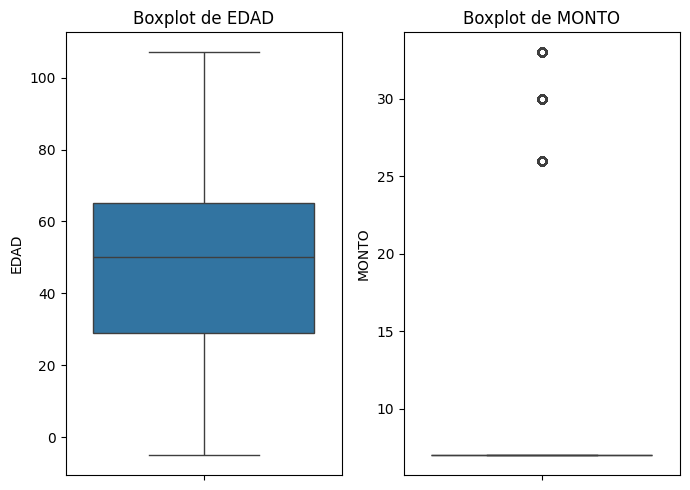

In [ ]:
v_numericas = list(v_numericas.columns)
v_numericas

# Criando subplots para cada columna
plt.figure(figsize=(7, 5))
for i, columna in enumerate(v_numericas):
    plt.subplot(1, len(v_numericas), i+1)
    sns.boxplot(data=data, y=columna)
    plt.title(f"Boxplot de {columna}")
plt.tight_layout()
plt.show()

## 4) Exploración de los datos

###  Descripcion y graficos de variables cualitativos y cuantitativos

In [ ]:
data.columns

Index(['FECHA_CORTE', 'ID', 'DIA_SOLICITACITA', 'DIA_CITA', 'ESPECIALIDAD',
       'SEXO', 'EDAD', 'SEGURO', 'PRESENCIAL_REMOTO', 'ATENDIDO', 'MONTO',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO'],
      dtype='object')

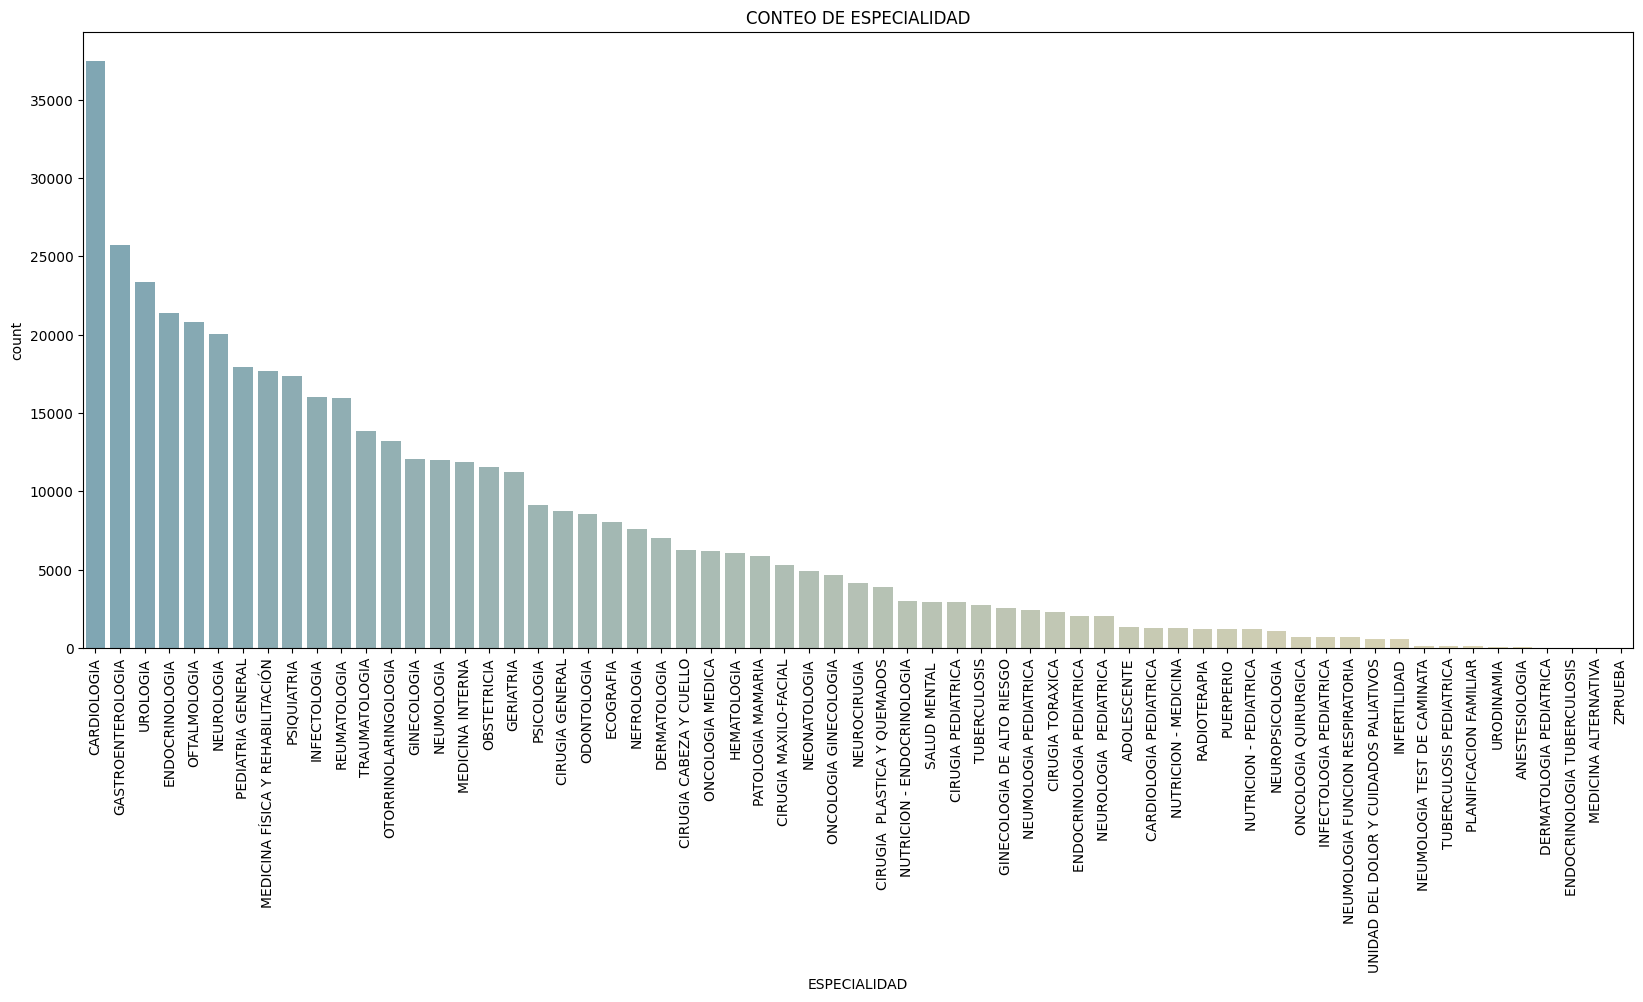

In [ ]:
order = data['ESPECIALIDAD'].value_counts().index
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x="ESPECIALIDAD", order = order, palette= 'blend:#7AB,#EDA')
#annotate_bars_percentage(ax)
plt.title("CONTEO DE ESPECIALIDAD")
plt.xticks(rotation=90)
plt.show()

In [ ]:
data['ESPECIALIDAD'].value_counts(ascending=True).head(20)

,count
ESPECIALIDAD,
ZPRUEBA,2
MEDICINA ALTERNATIVA,2
ENDOCRINOLOGIA TUBERCULOSIS,5
DERMATOLOGIA PEDIATRICA,14
ANESTESIOLOGIA,51
URODINAMIA,51
PLANIFICACION FAMILIAR,112
TUBERCULOSIS PEDIATRICA,125
NEUMOLOGIA TEST DE CAMINATA,127


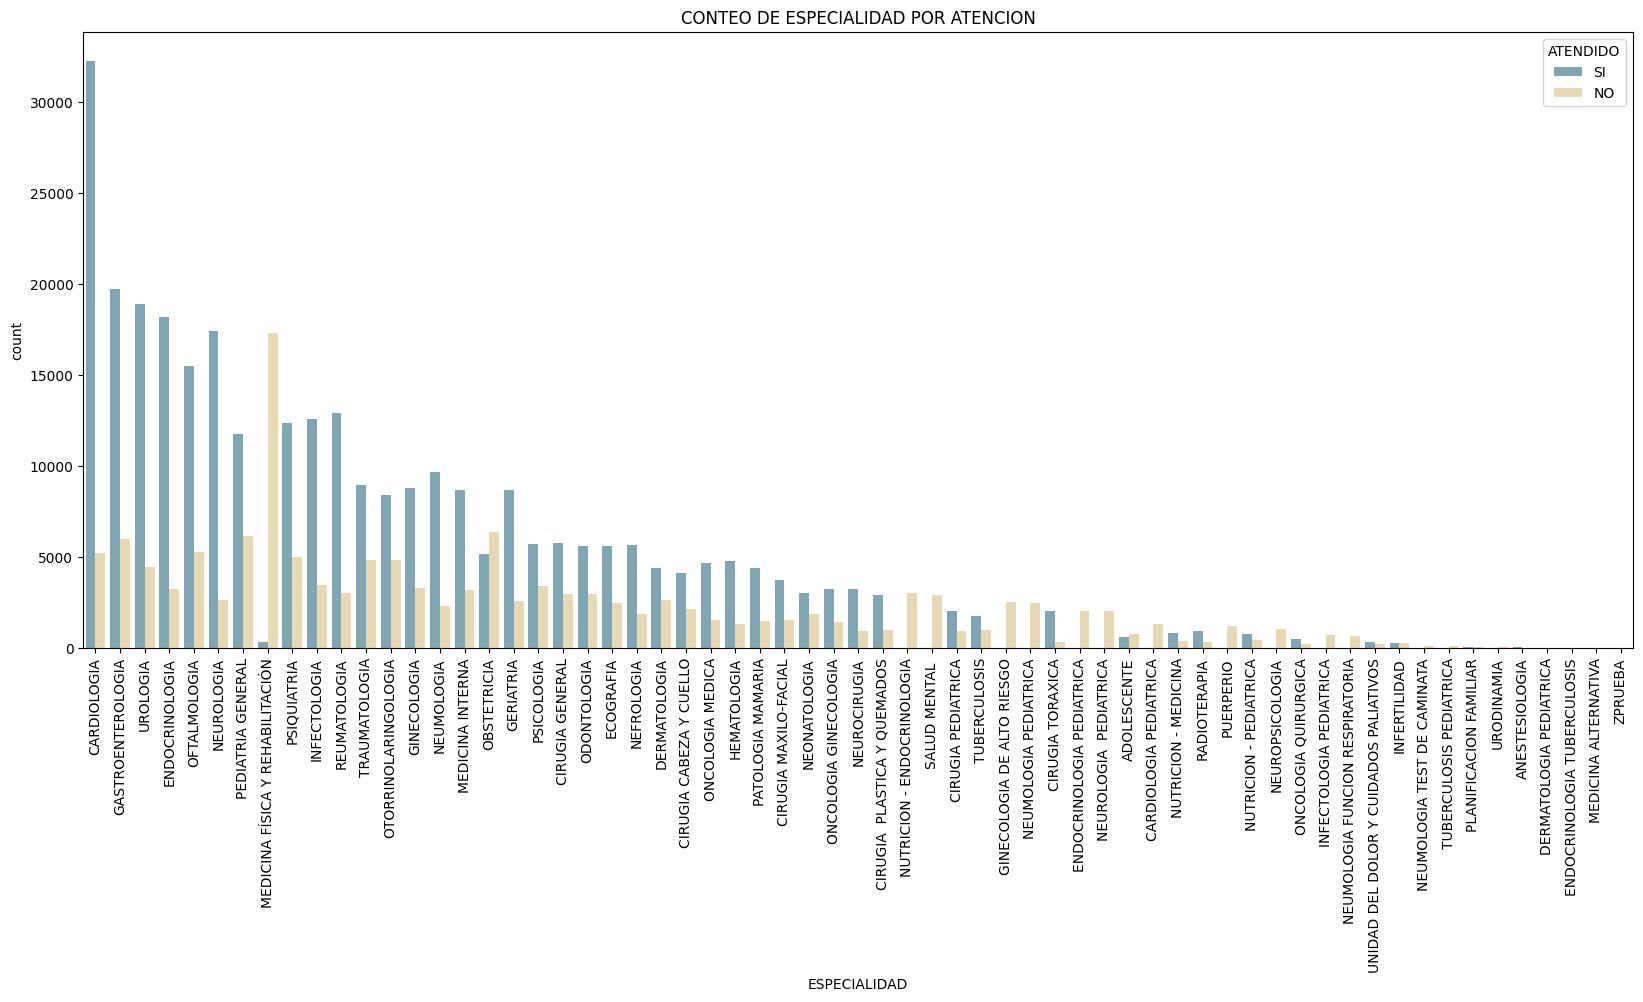

In [ ]:
order = data['ESPECIALIDAD'].value_counts().index
plt.figure(figsize=(20, 8))
sns.countplot(data=data, x="ESPECIALIDAD", hue = 'ATENDIDO', order = order, palette= 'blend:#7AB,#EDA')
#annotate_bars_percentage(ax)
plt.title("CONTEO DE ESPECIALIDAD POR ATENCION")
plt.xticks(rotation=90)
plt.show()

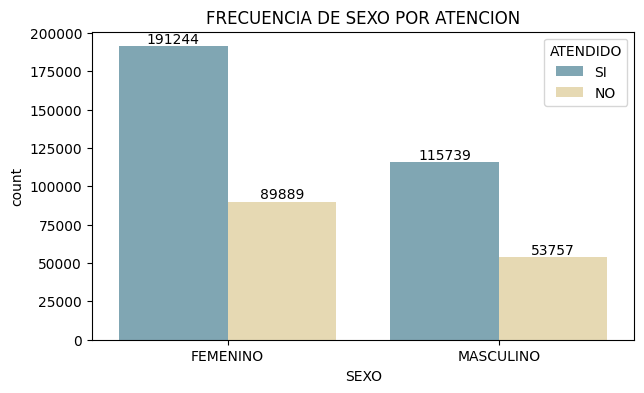

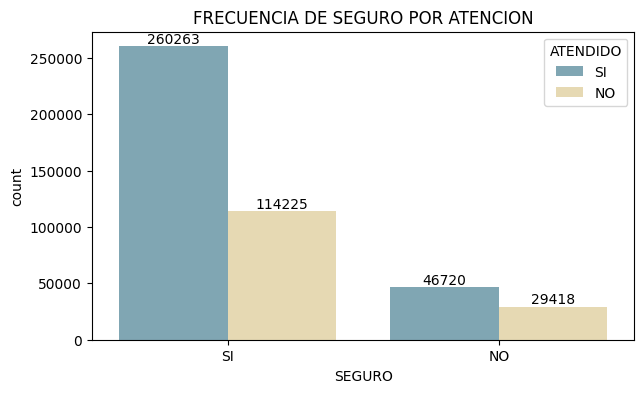

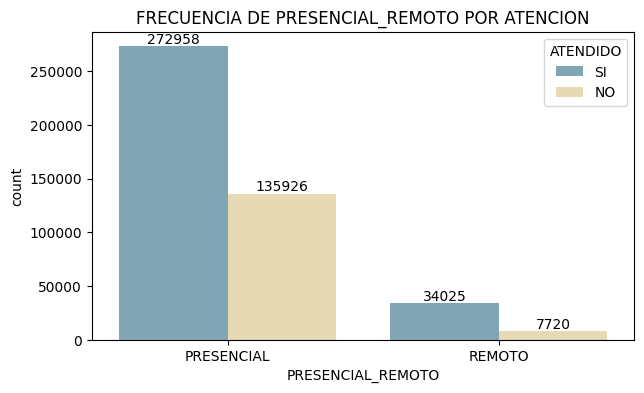

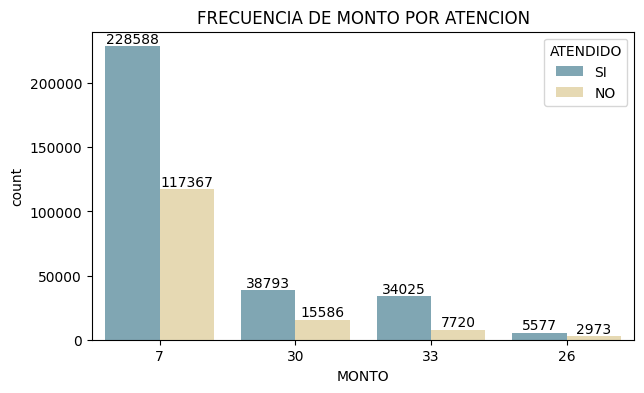

In [ ]:
# Lista de columnas a graficar
columns_to_plot = ['SEXO', 'SEGURO', 'PRESENCIAL_REMOTO','MONTO']

# Crear gráficos para cada columna
for column in columns_to_plot:
    order = data[column].value_counts().index
    plt.figure(figsize=(7, 4))
    ax = sns.countplot(data=data, x=column, order=order,hue ="ATENDIDO" ,palette="blend:#7AB,#EDA")
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', fontweight='normal', fontsize=10)
    #annotate_bars_percentage(ax
    plt.title(f"FRECUENCIA DE {column} POR ATENCION")
    #plt.xticks(rotation=90)
    plt.show()

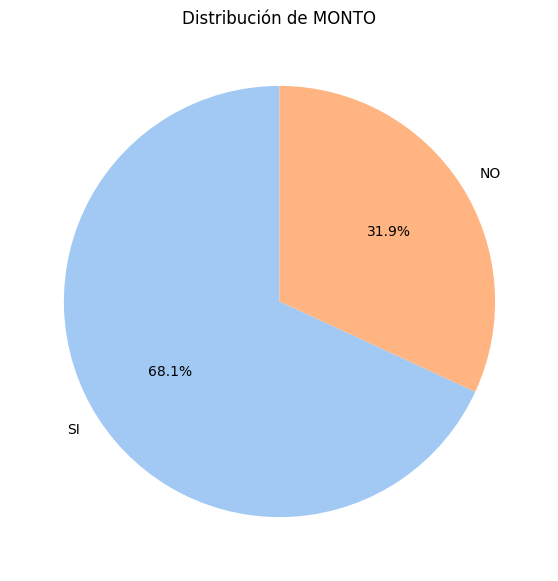

In [ ]:
# Gráfico de pastel del target
plt.figure(figsize=(7, 7))
data['ATENDIDO'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title(f"Distribución de {column}")
plt.ylabel('')
plt.show()

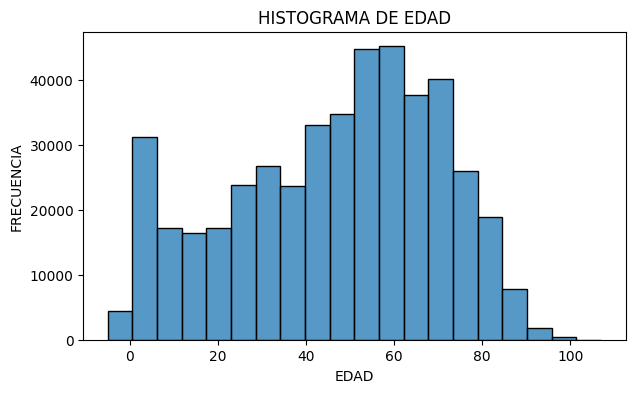

In [ ]:
plt.figure(figsize=(7, 4))
sns.histplot(data, x="EDAD", bins=20)
plt.title("HISTOGRAMA DE EDAD")
plt.xlabel("EDAD")
plt.ylabel("FRECUENCIA")
plt.show()


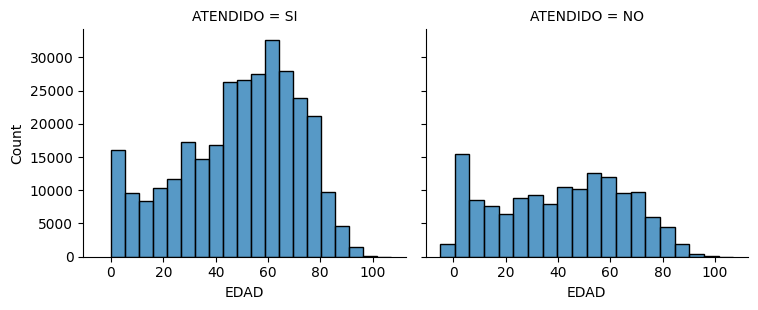

In [ ]:
columns_to_plot = ['ATENDIDO']
#['ATENDIDO','SEXO', 'SEGURO', 'PRESENCIAL_REMOTO', 'MONTO']
g = sns.FacetGrid(data, col=column,height=3.2, aspect=1.2)
g.map(sns.histplot, "EDAD",bins=20)


<Figure size 900x500 with 0 Axes>

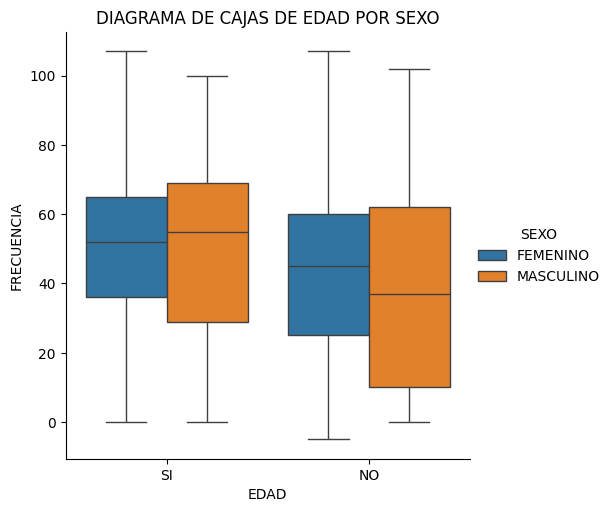

<Figure size 900x500 with 0 Axes>

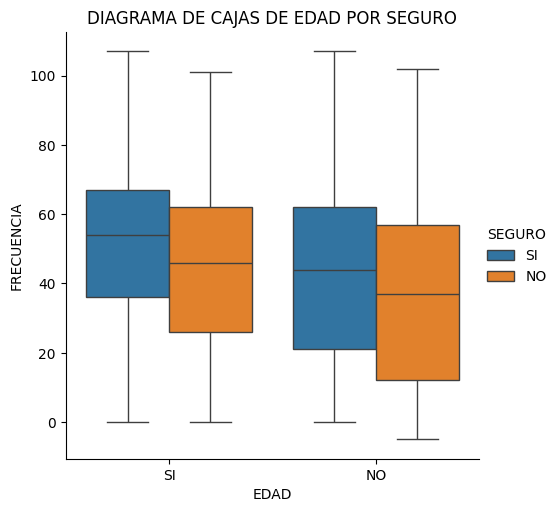

<Figure size 900x500 with 0 Axes>

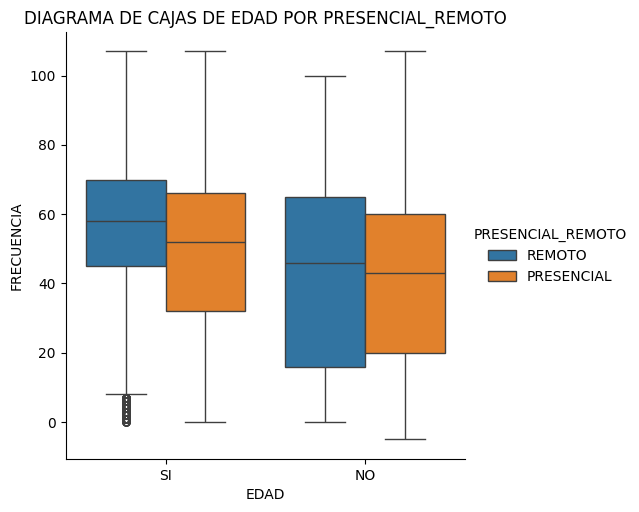

<Figure size 900x500 with 0 Axes>

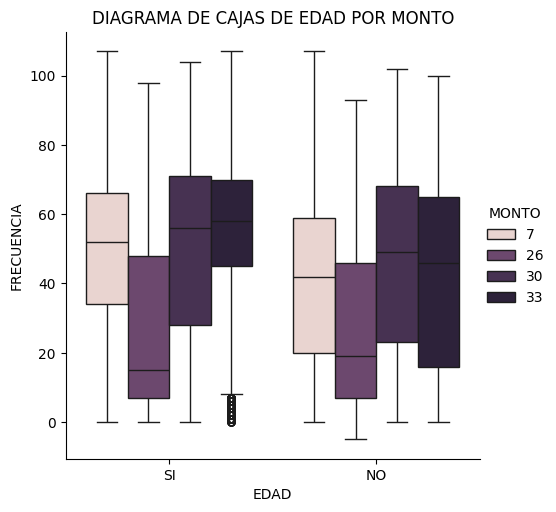

In [ ]:

# Lista de columnas a graficar
columns_to_plot = ['SEXO', 'SEGURO', 'PRESENCIAL_REMOTO', 'MONTO']

# Crear gráficos para cada columna
for column in columns_to_plot:
    plt.figure(figsize=(9, 5))
    sns.catplot(data=data, x="ATENDIDO", y="EDAD",hue=column, kind="box")
    plt.title(f"DIAGRAMA DE CAJAS DE EDAD POR {column}")
    plt.xlabel("EDAD")
    plt.ylabel("FRECUENCIA")
    plt.show()

### correlacion de variables

<Axes: >

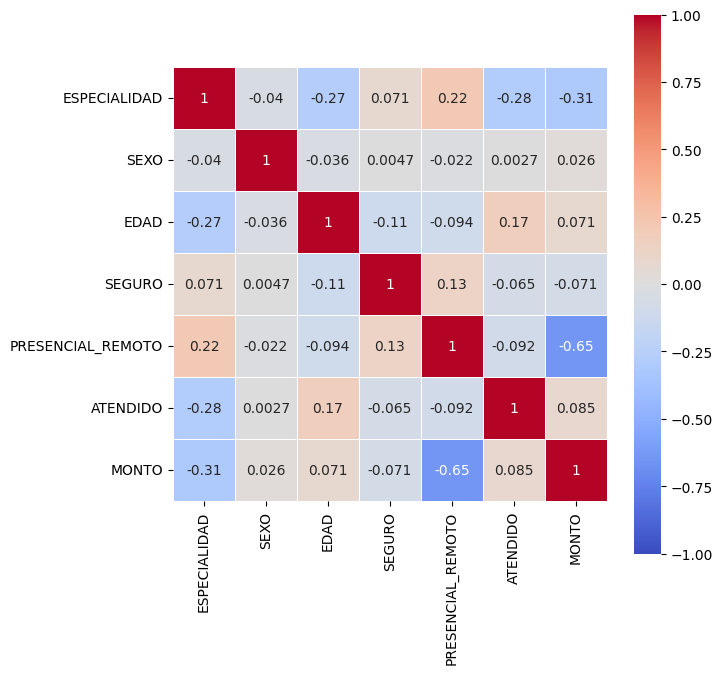

In [ ]:
# Seleccionar columnas numéricas y de tipo objeto del conjunto de datos
v_numericas4 = data.select_dtypes(include=['float64', 'int64', 'object'])
v_numericas4['ATENDIDO'] = v_numericas4['ATENDIDO'].map({'SI': 1, 'NO': 0})
# Factorizar columnas de tipo objeto para convertirlas a valores numéricos
for col in v_numericas4.select_dtypes(include=['object']).columns:
    v_numericas4[col] = pd.factorize(v_numericas4[col])[0]
v_numericas4 = v_numericas4.drop(['FECHA_CORTE','ID','DIA_SOLICITACITA','DIA_CITA','DEPARTAMENTO','PROVINCIA','DISTRITO','UBIGEO'],axis=1)
correlaciones1 = v_numericas4.corr()
f, ax = plt.subplots(figsize=(7,7))
sns.heatmap(correlaciones1,cmap="coolwarm",vmin=-1,vmax=1,
            linewidths=.5,square=True,annot=True)

# **Preparacion de los datos**

## 1) Selección de los datos





In [ ]:
data.columns

Index(['FECHA_CORTE', 'ID', 'DIA_SOLICITACITA', 'DIA_CITA', 'ESPECIALIDAD',
       'SEXO', 'EDAD', 'SEGURO', 'PRESENCIAL_REMOTO', 'ATENDIDO', 'MONTO',
       'DEPARTAMENTO', 'PROVINCIA', 'DISTRITO', 'UBIGEO'],
      dtype='object')

In [ ]:
data1 = data.iloc[:, 2:11]
data1 = data1.drop(['SEXO'],axis=1)
data1.head()

,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO
0,20221220,20230102,GERIATRIA,77.0,SI,REMOTO,SI,33
1,20221223,20230102,GASTROENTEROLOGIA,37.0,SI,PRESENCIAL,SI,7
2,20221212,20230102,ENDOCRINOLOGIA,70.0,NO,PRESENCIAL,SI,7
3,20221202,20230102,PSIQUIATRIA,52.0,SI,PRESENCIAL,SI,30
4,20221219,20230102,CARDIOLOGIA,56.0,SI,PRESENCIAL,SI,7


## 2) Limpieza de los datos

### Corregir los tipos de datos

In [ ]:
def corregir_tipos_de_datos(data1):

  # Convetir 'SI' y 'NO' a 1 y 0
  if 'ATENDIDO' in data1.columns:
    data1['ATENDIDO']= data1['ATENDIDO'].map({'SI':1, 'NO':0})
  # Convertir columnas de fecha a tipo datatime
  for col in ['DIA_SOLICITACITA', 'DIA_CITA']:
    if col in data.columns:
      data1[col]= pd.to_datetime(data1[col].astype(str), errors="coerce")

  return data1

data1 = corregir_tipos_de_datos(data1)

In [ ]:
data1.info()
#data1.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450629 entries, 0 to 450628
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DIA_SOLICITACITA   450629 non-null  datetime64[ns]
 1   DIA_CITA           450629 non-null  datetime64[ns]
 2   ESPECIALIDAD       450629 non-null  object        
 3   EDAD               450628 non-null  float64       
 4   SEGURO             450626 non-null  object        
 5   PRESENCIAL_REMOTO  450629 non-null  object        
 6   ATENDIDO           450629 non-null  int64         
 7   MONTO              450629 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 27.5+ MB


### Limpieza de registros

In [ ]:
def limpiar_datos(data1):
  # filtrar especialidades frecuentes
  data1 = data1[data1['ESPECIALIDAD'].map(data1['ESPECIALIDAD'].value_counts()) >= 365]
  #Eliminar nulos
  data1 = data1.dropna(subset=['EDAD','SEGURO'])
  # Edad a valor absoluto
  data1['EDAD']= data['EDAD'].abs()
  # Reiniciar indice
  return data1.reset_index(drop=True)

data1 = limpiar_datos(data1)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450136 entries, 0 to 450135
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DIA_SOLICITACITA   450136 non-null  datetime64[ns]
 1   DIA_CITA           450136 non-null  datetime64[ns]
 2   ESPECIALIDAD       450136 non-null  object        
 3   EDAD               450136 non-null  float64       
 4   SEGURO             450136 non-null  object        
 5   PRESENCIAL_REMOTO  450136 non-null  object        
 6   ATENDIDO           450136 non-null  int64         
 7   MONTO              450136 non-null  int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(3)
memory usage: 27.5+ MB


## 3) Construccion de variables

### Crear variables

In [ ]:
def crear_variables(data):
    """
    Crea variables derivadas de fechas para análisis.
    Requiere columnas 'DIA_CITA' y 'DIA_SOLICITACITA' en formato datetime.

    - DIFERENCIA_DIAS: días entre solicitud y cita
    - mes_cita: mes de la cita
    - estacion_cita: estación del año (hemisferio sur), convertida a entero
    - semana_mes_cita: semana del mes (1 a 5)
    - bimestre_cita: bimestre del año (1 a 6)
    - trimestre_cita: trimestre del año (1 a 4)
    - Cita_mes_diferente: 1 si el mes de cita es distinto al de solicitud
    - semestre_cita: semestre del año (1 o 2)
    """

    def obtener_estacion(fecha):
        año = fecha.year
        if pd.Timestamp(f'{año}-12-21') <= fecha or fecha < pd.Timestamp(f'{año}-3-21'):
            return 'verano'
        elif pd.Timestamp(f'{año}-3-21') <= fecha < pd.Timestamp(f'{año}-6-21'):
            return 'otoño'
        elif pd.Timestamp(f'{año}-6-21') <= fecha < pd.Timestamp(f'{año}-9-23'):
            return 'invierno'
        else:
            return 'primavera'

    # Calcular diferencia en días
    data['Diferencia_dias'] = (data['DIA_CITA'] - data['DIA_SOLICITACITA']).dt.days

    # Extraer componentes de fecha
    data['mes_cita'] = data['DIA_CITA'].dt.month
    data['semana_mes_cita'] = (data['DIA_CITA'].dt.day.sub(1) // 7) + 1
    data['bimestre_cita'] = ((data['DIA_CITA'].dt.month - 1) // 2) + 1
    data['trimestre_cita'] = ((data['DIA_CITA'].dt.month - 1) // 3) + 1
    data['semestre_cita'] = ((data['DIA_CITA'].dt.month - 1) // 6) + 1
    data['Cita_mes_diferente'] = (data['DIA_SOLICITACITA'].dt.month != data['DIA_CITA'].dt.month).astype(int)

    # Estación del año y codificación
    data['estacion_cita'] = data['DIA_CITA'].apply(obtener_estacion)
    data['estacion_cita'] = pd.factorize(data['estacion_cita'])[0]

    return data

data1 = crear_variables(data1)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450136 entries, 0 to 450135
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DIA_SOLICITACITA    450136 non-null  datetime64[ns]
 1   DIA_CITA            450136 non-null  datetime64[ns]
 2   ESPECIALIDAD        450136 non-null  object        
 3   EDAD                450136 non-null  float64       
 4   SEGURO              450136 non-null  object        
 5   PRESENCIAL_REMOTO   450136 non-null  object        
 6   ATENDIDO            450136 non-null  int64         
 7   MONTO               450136 non-null  int64         
 8   Diferencia_dias     450136 non-null  int64         
 9   mes_cita            450136 non-null  int32         
 10  semana_mes_cita     450136 non-null  int32         
 11  bimestre_cita       450136 non-null  int32         
 12  trimestre_cita      450136 non-null  int32         
 13  semestre_cita       450136 no

### * Correlacion con las nuevas variables

<Axes: >

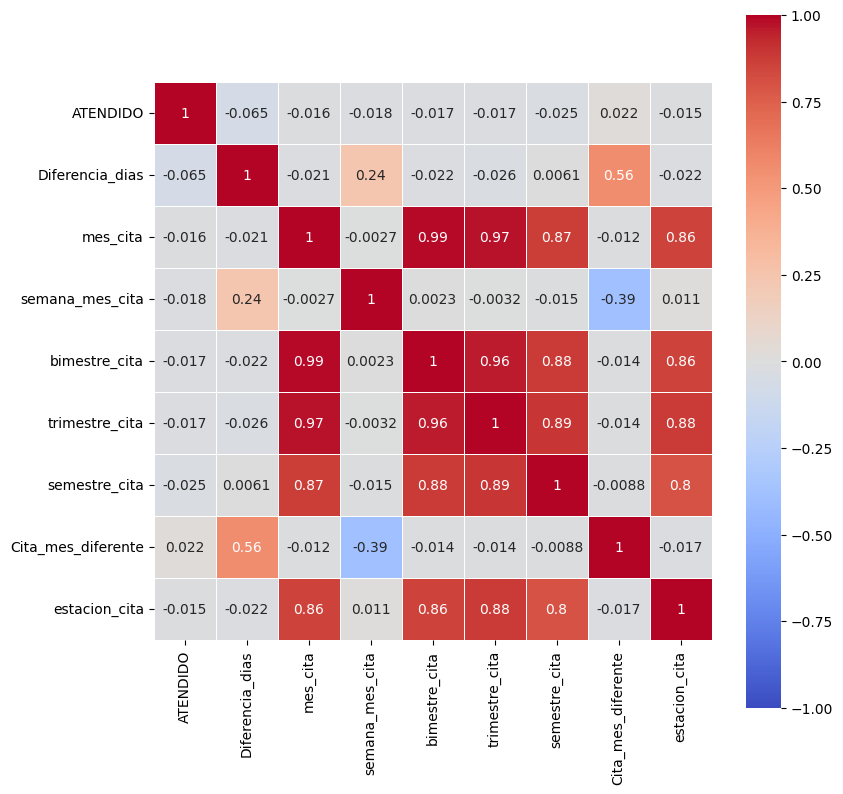

In [ ]:
# Seleccionar columnas numéricas del conjunto de datos nuevos
v_numericas5 = data1.iloc[:, [6] + list(range(8,16))]

correlaciones2 = v_numericas5.corr()
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(correlaciones2,cmap="coolwarm",vmin=-1,vmax=1,
            linewidths=.5,square=True,annot=True)

In [ ]:
# Select the columns and convert their type to 'category'
cols= data1.columns[[7] + list(range(9,16))]
data1[cols] = data1[cols].astype('category')

# Verificar los tipos de datos actualizados
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450136 entries, 0 to 450135
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DIA_SOLICITACITA    450136 non-null  datetime64[ns]
 1   DIA_CITA            450136 non-null  datetime64[ns]
 2   ESPECIALIDAD        450136 non-null  object        
 3   EDAD                450136 non-null  float64       
 4   SEGURO              450136 non-null  object        
 5   PRESENCIAL_REMOTO   450136 non-null  object        
 6   ATENDIDO            450136 non-null  int64         
 7   MONTO               450136 non-null  category      
 8   Diferencia_dias     450136 non-null  int64         
 9   mes_cita            450136 non-null  category      
 10  semana_mes_cita     450136 non-null  category      
 11  bimestre_cita       450136 non-null  category      
 12  trimestre_cita      450136 non-null  category      
 13  semestre_cita       450136 no

###  Descripcion de la nueva variable columnas

In [ ]:
data1['Diferencia_dias'].describe()

,Diferencia_dias
count,450136.000000
mean,19.814940
std,12.777777
min,-1.000000
25%,9.000000
50%,17.000000
75%,28.000000
max,89.000000


In [ ]:
df_diasn = data1[data1['Diferencia_dias'] < 0]
df_diasn

,DIA_SOLICITACITA,DIA_CITA,ESPECIALIDAD,EDAD,SEGURO,PRESENCIAL_REMOTO,ATENDIDO,MONTO,Diferencia_dias,mes_cita,semana_mes_cita,bimestre_cita,trimestre_cita,semestre_cita,Cita_mes_diferente,estacion_cita
107700,2023-03-31,2023-03-30,SALUD MENTAL,30.0,SI,REMOTO,0,33,-1,3,5,2,1,1,0,1
107750,2023-03-31,2023-03-30,SALUD MENTAL,23.0,SI,REMOTO,0,33,-1,3,5,2,1,1,0,1
132970,2023-04-21,2023-04-20,SALUD MENTAL,41.0,SI,REMOTO,0,33,-1,4,3,2,2,1,0,1
417362,2023-12-05,2023-12-04,OTORRINOLARINGOLOGIA,61.0,NO,PRESENCIAL,1,7,-1,12,1,6,4,2,0,3


### Limpieza de la nueva variable

In [ ]:
def limpiar_diferencia_dias(data):
    return data[data['Diferencia_dias'] >= 0].reset_index(drop=True)

data1 = limpiar_diferencia_dias(data1)


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450132 entries, 0 to 450131
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   DIA_SOLICITACITA    450132 non-null  datetime64[ns]
 1   DIA_CITA            450132 non-null  datetime64[ns]
 2   ESPECIALIDAD        450132 non-null  object        
 3   EDAD                450132 non-null  float64       
 4   SEGURO              450132 non-null  object        
 5   PRESENCIAL_REMOTO   450132 non-null  object        
 6   ATENDIDO            450132 non-null  int64         
 7   MONTO               450132 non-null  category      
 8   Diferencia_dias     450132 non-null  int64         
 9   mes_cita            450132 non-null  category      
 10  semana_mes_cita     450132 non-null  category      
 11  bimestre_cita       450132 non-null  category      
 12  trimestre_cita      450132 non-null  category      
 13  semestre_cita       450132 no

In [ ]:
# Seleccionar columnas por posición
df_iloc = data1.iloc[:, 2:9]

# Seleccionar columnas por nombre
df_names = data1[['semestre_cita', 'Cita_mes_diferente','semana_mes_cita']]

# Concatenar ambas partes
data2 = pd.concat([df_iloc, df_names], axis=1)


## 4) Formateo de datos

###  Escalamiento de variables numericos

In [ ]:
v_numericos = data2.select_dtypes([int,float]).drop(['ATENDIDO'],axis=1)
v_numericos.columns

Index(['EDAD', 'Diferencia_dias'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
#v_numericos_minmax = pd.DataFrame(MinMaxScaler().fit_transform(v_numericos), columns=v_numericos.columns)
v_numericas_std = pd.DataFrame(StandardScaler().fit_transform(v_numericos), columns=v_numericos.columns)

###  Duminizacion de variables categoricas

In [ ]:
v_dum = data2.select_dtypes(["category","object"])
v_dum.columns


Index(['ESPECIALIDAD', 'SEGURO', 'PRESENCIAL_REMOTO', 'MONTO', 'semestre_cita',
       'Cita_mes_diferente', 'semana_mes_cita'],
      dtype='object')

In [ ]:
encoder = ce.OneHotEncoder(cols=v_dum.columns, use_cat_names=True)
# Aplicamos la transformación de OneHotEncoder
v_dum_encoded = encoder.fit_transform(v_dum)


In [ ]:
data3 = pd.concat([v_numericas_std,v_dum_encoded],axis=1)
data3.shape

(450132, 73)

In [ ]:
X = data3
y = data2['ATENDIDO']
y.unique()

array([1, 0])

### Tratamiento de desbalance de clases

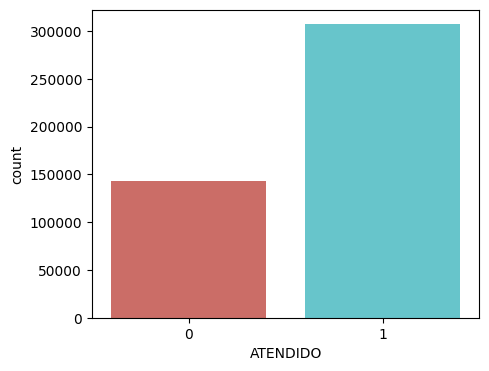

ATENDIDO
1    306883
0    143249
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='ATENDIDO',data= data2,palette='hls')
plt.show()
print(data2['ATENDIDO'].value_counts())

In [ ]:
X_bal, y_bal = SMOTETomek(sampling_strategy="minority", n_jobs=-1).fit_resample(X, y)

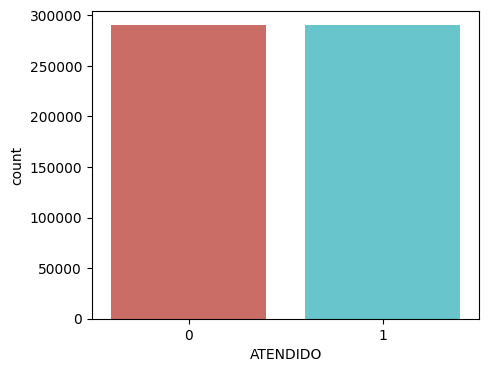

ATENDIDO
1    289958
0    289958
Name: count, dtype: int64


In [ ]:
plt.figure(figsize=(5,4))
sns.countplot(x=y_bal, palette="hls")
plt.show()
print(y_bal.value_counts())

# **Modelado**

## 1) Selección de técnicas de modelado
Se seleccionaron algoritmos basados en árboles por su robustez, interpretabilidad y capacidad para manejar datos tabulares. Se utilizaron modelos de boosting y modelos de bagging:

- Modelos de Boosting por Gradiente: LightGBM, XGBoost
- Modelos de Bagging: Random Forest, Extra Trees

In [ ]:
# Librerías y configuración general
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import (
    classification_report, ConfusionMatrixDisplay, accuracy_score,
    precision_score, recall_score, f1_score, roc_auc_score
)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
import matplotlib.pyplot as plt

## 2) Configuración y entrenamiento de modelos

Se construyeron cuatro modelos de clasificación basados en árboles: LightGBM, XGBoost, Random Forest y Extra Trees.  
Para cada uno se configuraron manualmente los hiperparámetros más influyentes, considerando la naturaleza del dataset y evitando técnicas automáticas de búsqueda (por tiempo y recursos).

Entre los parámetros ajustados destacan:

- **n_estimators**: cantidad de árboles del modelo.
- **max_depth**: profundidad máxima de los árboles.
- **learning_rate** (solo en boosting): tasa de aprendizaje.
- **subsample** y **colsample_bytree**: proporciones de muestreo para regularización.
- **regularización**: `reg_alpha`, `reg_lambda` en modelos boosting.
- **bootstrap**, `max_features` en modelos bagging.



Una vez definidos, se entrenaron sobre los datos balanceados (X_train, y_train) y se evaluaron sobre datos no vistos (X_test, y_test) y evaluación de cada modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.20, random_state=123, stratify=y_bal)

print("Dimensiones de los conjuntos de entrenamiento y prueba:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Dimensiones de los conjuntos de entrenamiento y prueba:
X_train: (463932, 73)
X_test: (115984, 73)
y_train: (463932,)
y_test: (115984,)


In [ ]:
# Definir modelos
model_lgbm = LGBMClassifier(
    boosting_type='gbdt',
    objective='binary',
    random_state=42,
    n_jobs=-1,
    verbosity=-1,
    force_row_wise=True,
    n_estimators=1500,
    learning_rate=0.05,
    num_leaves=35,
    max_depth=None,
)

model_xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    random_state=42,
    n_jobs=-1,
    n_estimators=1800,
    learning_rate=0.05,
    max_depth=7,
    subsample=0.8,
)

model_rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=None,
    max_features='sqrt',
    bootstrap=True,
    random_state=42,
    n_jobs=-1,
    verbose=0
)

model_et = ExtraTreesClassifier(
    n_estimators=150,
    max_depth=None,
    max_features='sqrt',
    bootstrap=False,
    random_state=42,
    n_jobs=-1
)


## 3) Validación del modelo
Se aplicó validación cruzada estratificada con 3 folds para estimar el rendimiento previo a probar en test.

In [ ]:
# Validación cruzada (accuracy como métrica)
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
model_list = [
    ("LightGBM", model_lgbm),
    ("XGBoost", model_xgb),
    ("Random Forest", model_rf),
    ("Extra Trees", model_et)
]

for name, model in model_list:
    print(f"\nEvaluando modelo con validación cruzada: {name}")
    cv_results = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    print(f"Accuracy por fold: {cv_results}")
    print(f"Accuracy promedio: {cv_results.mean():.4f}")
    print(f"Desviación estándar: {cv_results.std():.4f}")


Evaluando modelo con validación cruzada: LightGBM
Accuracy por fold: [0.8130933  0.8118388  0.81125682]
Accuracy promedio: 0.8121
Desviación estándar: 0.0008

Evaluando modelo con validación cruzada: XGBoost
Accuracy por fold: [0.75935697 0.75500504 0.76255787]
Accuracy promedio: 0.7590
Desviación estándar: 0.0031

Evaluando modelo con validación cruzada: Random Forest
Accuracy por fold: [0.7576369  0.75548356 0.75925351]
Accuracy promedio: 0.7575
Desviación estándar: 0.0015

Evaluando modelo con validación cruzada: Extra Trees
Accuracy por fold: [0.75540596 0.75384108 0.75563229]
Accuracy promedio: 0.7550
Desviación estándar: 0.0008


## 4) Evaluación final en el conjunto de prueba
Se evaluó cada modelo en `X_test`, mostrando métricas clave y la matriz de confusión como gráfico.


 Evaluando modelo en test: LightGBM
 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.9359    0.6718    0.7822     57992
           1     0.7440    0.9540    0.8360     57992

    accuracy                         0.8129    115984
   macro avg     0.8400    0.8129    0.8091    115984
weighted avg     0.8400    0.8129    0.8091    115984

 Métricas Individuales:
Accuracy       : 0.8129
Precision (ponderado) : 0.8400
Recall (ponderado)    : 0.8129
F1 Score (ponderado)  : 0.8091
ROC AUC Score  : 0.8794


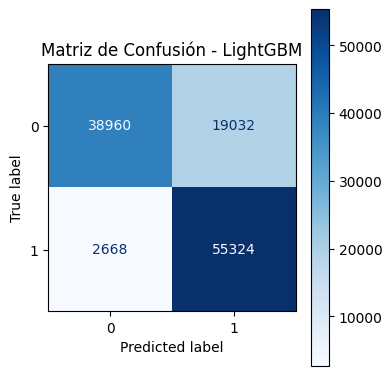


 Evaluando modelo en test: XGBoost
 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.8432    0.6463    0.7318     57992
           1     0.7133    0.8798    0.7879     57992

    accuracy                         0.7631    115984
   macro avg     0.7783    0.7631    0.7598    115984
weighted avg     0.7783    0.7631    0.7598    115984

 Métricas Individuales:
Accuracy       : 0.7631
Precision (ponderado) : 0.7783
Recall (ponderado)    : 0.7631
F1 Score (ponderado)  : 0.7598
ROC AUC Score  : 0.8429


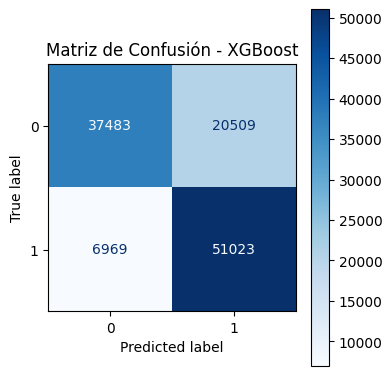


 Evaluando modelo en test: Random Forest
 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.7909    0.7559    0.7730     57992
           1     0.7663    0.8002    0.7828     57992

    accuracy                         0.7780    115984
   macro avg     0.7786    0.7780    0.7779    115984
weighted avg     0.7786    0.7780    0.7779    115984

 Métricas Individuales:
Accuracy       : 0.7780
Precision (ponderado) : 0.7786
Recall (ponderado)    : 0.7780
F1 Score (ponderado)  : 0.7779
ROC AUC Score  : 0.8562


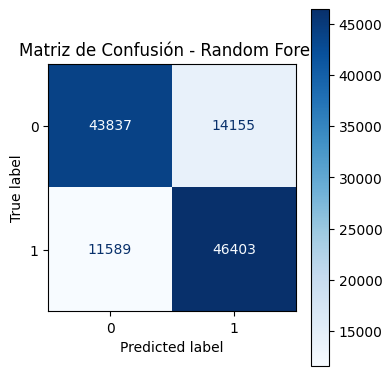


 Evaluando modelo en test: Extra Trees
 Reporte de Clasificación:
              precision    recall  f1-score   support

           0     0.7785    0.7741    0.7763     57992
           1     0.7753    0.7797    0.7775     57992

    accuracy                         0.7769    115984
   macro avg     0.7769    0.7769    0.7769    115984
weighted avg     0.7769    0.7769    0.7769    115984

 Métricas Individuales:
Accuracy       : 0.7769
Precision (ponderado) : 0.7769
Recall (ponderado)    : 0.7769
F1 Score (ponderado)  : 0.7769
ROC AUC Score  : 0.8324


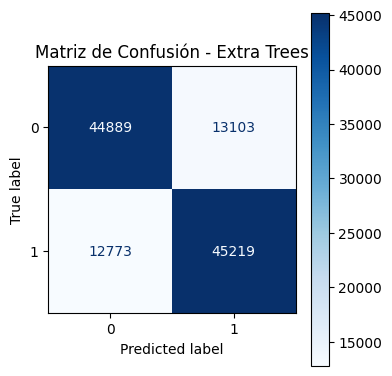

In [ ]:
# Evaluación sobre el test
models = {
    "LightGBM": model_lgbm,
    "XGBoost": model_xgb,
    "Random Forest": model_rf,
    "Extra Trees": model_et
}

for name, model in models.items():
    print(f"\n Evaluando modelo en test: {name}")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print(" Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, digits=4))

    print(" Métricas Individuales:")
    print(f"Accuracy       : {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision (ponderado) : {precision_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"Recall (ponderado)    : {recall_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"F1 Score (ponderado)  : {f1_score(y_test, y_pred, average='weighted'):.4f}")
    print(f"ROC AUC Score  : {roc_auc_score(y_test, y_proba):.4f}")

    # Matriz de confusión como gráfico
    fig, ax = plt.subplots(figsize=(4, 4))
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, cmap='Blues', values_format='d', ax=ax
    )
    ax.set_title(f'Matriz de Confusión - {name}')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# **Evaluación**

En esta etapa se analizó el rendimiento de los modelos entrenados con el conjunto de prueba (`X_test`, `y_test`) con el objetivo de seleccionar el modelo más adecuado para la predicción de asistencia a citas médicas en el Hospital de Apoyo María Auxiliadora.

## Comparación de métricas principales

| Modelo         | Accuracy | F1 ponderado | ROC AUC |
|----------------|----------|--------------|---------|
| **LightGBM**   | **0.8129** | **0.8091**   | **0.8794** |
| XGBoost        | 0.7631   | 0.7598       | 0.8429  |
| Random Forest  | 0.7780   | 0.7779       | 0.8562  |
| Extra Trees    | 0.7769   | 0.7769       | 0.8324  |

## Conclusión

El modelo **LightGBM** presentó el mejor desempeño general en términos de:

- Precisión global (accuracy),
- Balance entre precisión y recall (F1-score ponderado),
- Capacidad discriminativa entre clases (ROC AUC).

Además, logró un **recall alto para la clase positiva**, lo cual es clave para anticipar con precisión los pacientes que sí asistirán a su cita médica, optimizando así la planificación de recursos hospitalarios.

En base a estos resultados, **LightGBM** fue seleccionado como el modelo final para la fase de implementación.


# **Implementación**

Como resultado del análisis y evaluación de los modelos predictivos, se propone implementar el modelo **LightGBM** en el sistema de gestión del Hospital de Apoyo María Auxiliadora.

## Objetivo de la implementación

El modelo tiene como finalidad anticipar la probabilidad de asistencia de los pacientes a sus citas médicas programadas. Esto permitirá:

- Optimizar la asignación de médicos y recursos hospitalarios.
- Reducir la congestión por inasistencias.
- Mejorar la programación de citas y la eficiencia operativa.

## Propuesta de integración

1. **Despliegue del modelo**: El modelo entrenado será exportado y alojado en un entorno productivo (servidor local o nube), listo para recibir nuevos datos de pacientes y devolver predicciones en tiempo real o por lotes.

2. **Interfaz de uso**: Se puede desarrollar una interfaz web sencilla donde el personal administrativo ingrese los datos de la cita y el sistema devuelva la probabilidad de asistencia.

3. **Automatización**: Integrar el modelo con el sistema de citas del hospital para procesar las solicitudes de manera automatizada y generar alertas sobre posibles inasistencias.

4. **Monitoreo continuo**: Establecer un plan de monitoreo del rendimiento del modelo con métricas clave como accuracy y recall. Además, implementar rutinas periódicas de reentrenamiento con datos actualizados.

5. **Capacitación**: Brindar capacitación básica al personal del hospital para interpretar las predicciones y actuar en consecuencia, como confirmar citas de alto riesgo de inasistencia.

## Consideraciones finales

La implementación del modelo debe ir acompañada de políticas internas de uso ético y responsable de los datos, garantizando la confidencialidad del paciente. Con esta propuesta, el hospital podrá avanzar hacia una atención médica más predictiva, eficiente y centrada en el paciente.
